In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
from helper_functions import *


ticker = 'TSLA'
date_range = ['2020-01-01', '2021-03-05']
date = '2021-03-10'
window = 'year1month4'
interval = '5min'
website = 'alphavantage'

In [35]:
price = load_price_df(ticker, date)
df = load_news_df(ticker, date_range, website='finnhub')
price_timestamp(df)
get_prices(df, price)
df

,headline,related,source,summary,price_ts,price,price_1d,price_1h
datetime,,,,,,,,
2021-03-05 07:30:41,Investing In Intangible Assets Revisited,TSLA,seekingalpha.com,"Intangible assets are becoming an increasingly important portion of not only company balance sheets, but also their ability to grow and generate profits.",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-04 21:33:00,Tesla Inc. stock underperforms Thursday when compared to competitors,TSLA,marketwatch,"Shares of Tesla Inc. slid 4.86% to $621.44 Thursday, on what proved to be an all-around grim trading session for the stock market, with the NASDAQ Composite...",2021-03-04 18:00:00,614.6000,596.520,614.6000
2021-03-04 13:48:00,EV Stocks NIO and Tesla Are Falling Again. It’s Not the Companies’ Fault.,TSLA,MarketWatch,"High-flying shares of electric-vehicle makers are falling yet again. Recent declines have been jarring, but external factors are to blame.",2021-03-04 13:50:00,605.7659,599.935,620.7223
...,...,...,...,...,...,...,...,...
2021-02-12 00:03:17,"Today's Hot Mover- Tesla, Inc. (NASDAQ:TSLA) with the stream of 0.85% - Stocks Equity",TSLA,http://www.stocksequity.com,"On Thursday, shares of Tesla, Inc. (NASDAQ:TSLA) reached at $811.66 price level during last trade its distance from 20 days simple moving average was -4.27%, and its distance from 50 …",2021-02-11 18:00:00,811.1900,815.700,811.1900
2021-02-12 00:00:00,"5 Fun Takeaways From Elon Musk's Latest Chat With Joe Rogan: Bond, 'Borat' And More",TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) CEO Elon Musk was on Joe Rogan's podcast for the third time and the world's richest person kicked off the show with an ode to Sacha Baron Cohen...,2021-02-11 18:00:00,811.1900,815.700,811.1900
2021-02-12 00:00:00,Elon Musk Plans For Tesla Roadster To Be Able To Hover 6 Feet In The Air,TSLA,benzinga,"Tesla Inc's (NASDAQ: TSLA) refreshed Model S Plaid will be delivered to customers starting this month, with the fastest 0-60 time of any production car at 1.99 seconds....",2021-02-11 18:00:00,811.1900,815.700,811.1900


In [48]:
df['change_1h'] = (df['price_1h'] - df['price'])/df['price']
df['change_1d'] = (df['price_1d'] - df['price'])/df['price']

# Sentiment analysis

In [36]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
scores = df['headline'].apply(vader.polarity_scores)
df = df.join(pd.DataFrame.from_records(scores, index=df.index))

In [69]:
#df.groupby(df.index.date)['compound'].mean()
#df.groupby(df.index.date)['change_1d'].mean()
df

,headline,related,source,summary,price_ts,price,price_1d,price_1h,neg,neu,pos,compound,change_1h,change_1d
datetime,,,,,,,,,,,,,,
2021-02-12 00:00:00,"5 Fun Takeaways From Elon Musk's Latest Chat With Joe Rogan: Bond, 'Borat' And More",TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) CEO Elon Musk was on Joe Rogan's podcast for the third time and the world's richest person kicked off the show with an ode to Sacha Baron Cohen...,2021-02-11 18:00:00,811.19,815.70,811.19,0.0,0.798,0.202,0.5106,0.0,0.005560
2021-02-12 00:00:00,"5 Fun Takeaways From Elon Musk's Latest Chat With Joe Rogan: Bond, 'Borat' And More",TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) CEO Elon Musk was on Joe Rogan's podcast for the third time and the world's richest person kicked off the show with an ode to Sacha Baron Cohen...,2021-02-11 18:00:00,811.19,815.70,811.19,0.0,1.000,0.000,0.0000,0.0,0.005560
2021-02-12 00:00:00,"5 Fun Takeaways From Elon Musk's Latest Chat With Joe Rogan: Bond, 'Borat' And More",TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) CEO Elon Musk was on Joe Rogan's podcast for the third time and the world's richest person kicked off the show with an ode to Sacha Baron Cohen...,2021-02-11 18:00:00,811.19,815.70,811.19,0.0,1.000,0.000,0.0000,0.0,0.005560
2021-02-12 00:00:00,"5 Fun Takeaways From Elon Musk's Latest Chat With Joe Rogan: Bond, 'Borat' And More",TSLA,benzinga,Tesla Inc (NASDAQ: TSLA) CEO Elon Musk was on Joe Rogan's podcast for the third time and the world's richest person kicked off the show with an ode to Sacha Baron Cohen...,2021-02-11 18:00:00,811.19,815.70,811.19,0.0,0.798,0.202,0.5106,0.0,0.005560
2021-02-12 00:00:00,Elon Musk Plans For Tesla Roadster To Be Able To Hover 6 Feet In The Air,TSLA,benzinga,"Tesla Inc's (NASDAQ: TSLA) refreshed Model S Plaid will be delivered to customers starting this month, with the fastest 0-60 time of any production car at 1.99 seconds....",2021-02-11 18:00:00,811.19,815.70,811.19,0.0,0.798,0.202,0.5106,0.0,0.005560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.60,596.52,614.60,0.0,0.603,0.397,0.7845,0.0,-0.029418
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.60,596.52,614.60,0.0,0.603,0.397,0.7845,0.0,-0.029418
2021-03-05 00:00:00,"Tesla Should Sell Its Bitcoin and Buy Back Shares To Create 'Positive Momentum,' Says Analyst",TSLA,benzinga,"Tesla Inc (NASDAQ: TSLA) could create a “positive momentum” if its sold its Bitcoin (CRYPTO: BTC) holdings and initiated a buyback of its stock, according to...",2021-03-04 18:00:00,614.60,596.52,614.60,0.0,0.603,0.397,0.7845,0.0,-0.029418


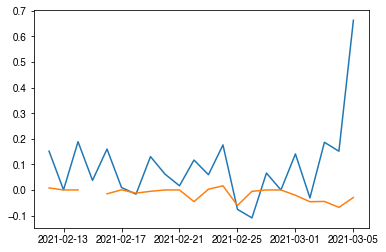

In [79]:
mean_df = df.groupby([df.index.date]).mean().unstack()
plt.plot(mean_df.xs('compound'))
plt.plot(mean_df.xs('change_1d'))